In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines

In [3]:
def create_list_to_plot(acc_cost_pairs, label,marker, color ,marker_label):
    list_to_plot = []
    for acc_cost_pair in acc_cost_pairs:
        acc = acc_cost_pair[0]
        cost = acc_cost_pair[1]
        ece = acc_cost_pair[2]
        inef =  acc_cost_pair[3]
        alpha = 100-acc_cost_pair[4]
        dict_point = {'label':label, 'cost': cost, 'gated_acc':acc, 'gated_ece':ece, 'inef':inef,'alpha':alpha, 'marker': marker, 'color':color, 'marker_label': marker_label}
        list_to_plot.append(dict_point)
    return list_to_plot

In [60]:
boosted_acc_pairs = [[39.040, 14.87, 26.79, 6.42, 94.38],  
[40.270, 15.65, 27.96, 6.39, 94.60],  
[41.350, 16.37, 28.97, 6.29, 94.55],  
[43.280, 17.67, 30.76, 6.16, 94.69],  
[45.160, 18.97, 32.49, 5.99, 94.74],  
[47.530, 20.46, 34.63, 5.89, 95.18],  
[50.680, 22.48, 37.45, 5.68, 95.48],  
[53.740, 24.73, 40.10, 5.29, 95.39],  
[57.440, 27.21, 43.33, 4.94, 95.49],  
[61.080, 29.74, 46.47, 4.47, 95.23],  
[64.690, 32.49, 49.53, 4.05, 95.21],  
[68.040, 35.36, 52.28, 3.65, 95.03],  
[70.970, 37.98, 54.68, 3.38, 95.20],  
[74.520, 41.10, 57.58, 2.94, 95.05],  
[77.140, 43.99, 59.65, 2.67, 95.30],  
[79.750, 46.73, 61.70, 2.39, 95.31],  
[81.850, 49.36, 63.31, 2.14, 95.29],  
[83.720, 51.86, 64.72, 1.96, 95.48],  
[85.720, 54.73, 66.22, 1.68, 95.36],  
[87.010, 57.01, 67.12, 1.55, 95.46],  
[88.420, 59.26, 68.19, 1.39, 95.03],  
[89.330, 60.95, 68.85, 1.33, 95.06],  
[90.150, 62.59, 69.45, 1.25, 94.98],  
[90.810, 64.00, 69.91, 1.21, 95.17],  
[91.560, 65.61, 70.44, 1.18, 95.44],  
[92.080, 66.84, 70.81, 1.13, 95.22],  
[92.510, 67.88, 71.11, 1.12, 95.49],  
[92.890, 68.89, 71.37, 1.09, 95.44],  
[93.110, 69.70, 71.50, 1.08, 95.45],  
[93.340, 70.51, 71.64, 1.07, 95.55],  
[93.390, 71.08, 71.65, 1.07, 95.60],  
[93.540, 71.73, 71.75, 1.06, 95.64],  
[93.740, 72.62, 71.86, 1.06, 95.71],  
[93.880, 73.14, 71.95, 1.05, 95.79],  
[93.960, 73.54, 72.00, 1.05, 95.90],  
[94.030, 73.91, 72.04, 1.05, 95.96],  
[94.190, 74.60, 72.14, 1.05, 95.95],  
[94.310, 75.09, 72.22, 1.04, 95.78],  
[94.400, 75.56, 72.27, 1.04, 95.88]]
label = 'boosted'
marker_label = 'boosted'
color = 'c'
marker = '.'
boosted_list_dict = create_list_to_plot(boosted_acc_pairs, label,marker, color ,marker_label)

In [68]:
app4 = [[93.1,66.3, 4.8, 1.11,95.4 ]]
label = 'Ours.'
marker_label = 'Ours.'
color = 'b'
marker = '^'
our_4results = create_list_to_plot(app4, label,marker, color ,marker_label)

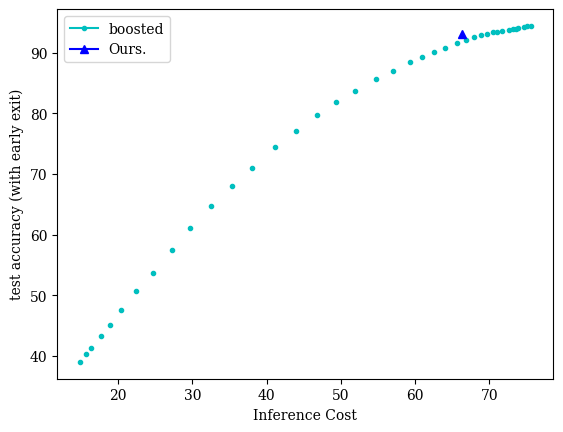

In [69]:
font = {'family' : 'serif',
        'size'   : 10}

combined_dicts = boosted_list_dict+our_4results
matplotlib.rc('font', **font)

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_acc = dict_of_result['gated_acc']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_acc, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference Cost')
ax.set_ylabel('test accuracy (with early exit)')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('perf_cost_app1vs3.pdf')

In [70]:
plt.close()

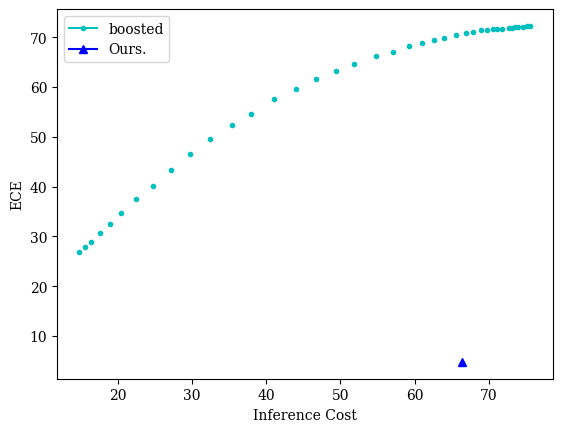

In [71]:

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('Inference Cost')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('ece_cost.pdf')

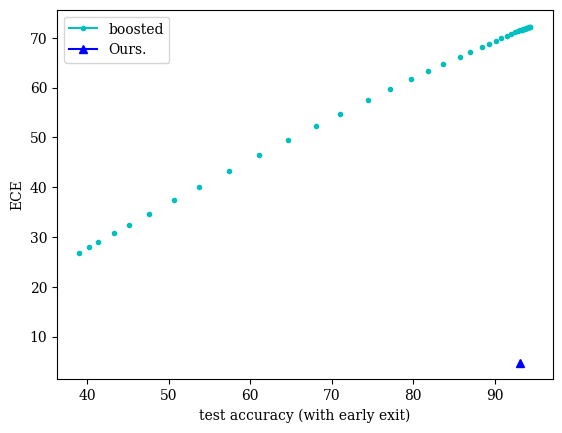

In [72]:

matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel('ECE')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_ece.pdf')

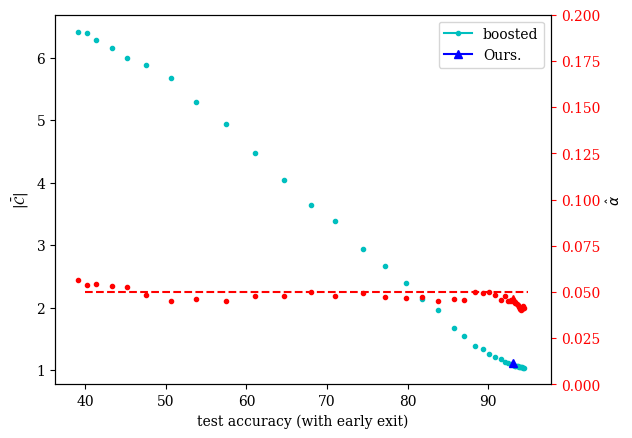

In [73]:
matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
ax2=ax.twinx()
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, gated_inef, marker, color=dict_of_result['color'])
    ax2.plot(gated_acc, alpha, marker, color='r')
# fig.xlabel('- inference cost')
patches = []
ax2.set_ylim([0, 0.2])
ax2.hlines(0.05, 40, 95, color='r', linestyles='dashed')
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_inef.pdf')

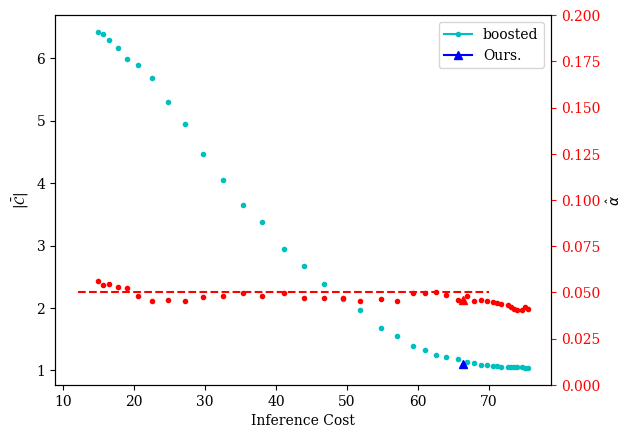

In [74]:
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
ax2=ax.twinx()
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_inef = dict_of_result['inef']
    alpha = dict_of_result['alpha']/100
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(cost, gated_inef, marker, color=dict_of_result['color'])
    ax2.plot(cost, alpha, marker, color='r')
# fig.xlabel('- inference cost')
ax2.set_ylim([0, 0.2])
ax2.hlines(0.05, 12, 70, color='r', linestyles='dashed')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax2.set_ylabel(r'$\hat{\alpha}$')
ax2.tick_params(axis='y', colors='red')
ax.set_xlabel('Inference Cost')
ax.set_ylabel(r'$\bar{|\mathcal{C}|}$')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('inef_cost.pdf')